In [1]:
import os
os.getcwd()

'/workspace/Assignment 15'

In [2]:
!ls

'Create Data (1).ipynb'         data		   model.py
 DataLoader.ipynb	        data_producer.py   overlay.zip
'Dice Loss Small (1).ipynb'     dice_loss.py	   runs
'Dice Loss Small-Copy1.ipynb'   lean_model.py	   train.py
 Validate.ipynb		        loss.py		   validate.py
 __pycache__		        maskoverlay.zip    visualize.py


In [3]:
import torch
torch.cuda.empty_cache()

In [4]:
from pathlib import Path

root_folder = Path.cwd()

In [5]:
import torch
cuda_check = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda_check else "cpu")

In [6]:
print(device)

cuda:0


In [7]:
print(root_folder)

/workspace/Assignment 15


In [8]:
from torchvision.transforms import transforms
from torchvision.transforms import ColorJitter

transform = transforms.Compose([
                                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
                                transforms.ToTensor(),
])

In [9]:
from torch.utils.tensorboard import SummaryWriter

In [10]:
from torchvision.transforms import transforms
from pathlib import Path
data_folder = root_folder / 'data'
train_folder = data_folder / 'train'
# test_folder = data_folder / 'test1'
# validate_folder = data_folder / 'validate1'
weights_folder = data_folder / 'weights'


In [11]:
writer = SummaryWriter('runs')

In [12]:
import data_producer as dp
import model as md
import train
# import test
import validate
import visualize as viz
import dice_loss as dl
import loss
import lean_model

In [13]:
train_set = dp.DataProducer(train_folder, transform)

In [14]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_set, batch_size=512, shuffle= True, num_workers = 12)
# test_dl = DataLoader(test_set, batch_size=16, shuffle= True,num_workers = 6)
# validate_dl = DataLoader(validate_set, batch_size=16, shuffle= True, num_workers = 6)

In [15]:
import torch.nn as nn
criterion = loss.calc_loss

In [16]:
model = md.ResNetUNet(n_class=1)
model = model.to(device)

In [17]:
saved_weight = weights_folder / 'epoch-350weights.pth'
print(saved_weight)

/workspace/Assignment 15/data/weights/epoch-350weights.pth


In [18]:
model.load_state_dict(torch.load(saved_weight))

<All keys matched successfully>

In [19]:
from torchsummary import summary
summary(model, input_size=(3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,792
              ReLU-2           [-1, 64, 64, 64]               0
            Conv2d-3           [-1, 64, 64, 64]          36,928
              ReLU-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 32, 32]           9,408
            Conv2d-6           [-1, 64, 32, 32]           9,408
       BatchNorm2d-7           [-1, 64, 32, 32]             128
       BatchNorm2d-8           [-1, 64, 32, 32]             128
              ReLU-9           [-1, 64, 32, 32]               0
             ReLU-10           [-1, 64, 32, 32]               0
        MaxPool2d-11           [-1, 64, 16, 16]               0
        MaxPool2d-12           [-1, 64, 16, 16]               0
           Conv2d-13           [-1, 64, 16, 16]          36,864
           Conv2d-14           [-1, 64,

In [20]:
optim = torch.optim.SGD(model.parameters(), lr = 0.0001, momentum=.9, weight_decay=1e-5)

Epoch -  351 -- Time Taken -  415.014121055603
Epoch -  352 -- Time Taken -  415.66910338401794
Epoch -  353 -- Time Taken -  415.81267404556274
Epoch -  354 -- Time Taken -  415.7356536388397
Epoch -  355 -- Time Taken -  415.67025804519653
Epoch -  356 -- Time Taken -  415.79758477211
Epoch -  357 -- Time Taken -  415.67945432662964
Epoch -  358 -- Time Taken -  415.848032951355
Epoch -  359 -- Time Taken -  415.8052625656128
Epoch -  360 -- Time Taken -  415.66928339004517
Epoch -  361 -- Time Taken -  415.7949290275574
Epoch -  362 -- Time Taken -  415.9458312988281
Epoch -  363 -- Time Taken -  415.95555090904236
Epoch -  364 -- Time Taken -  415.90647768974304
Epoch -  365 -- Time Taken -  415.79829382896423
Epoch -  366 -- Time Taken -  415.8247001171112
Epoch -  367 -- Time Taken -  415.91374921798706
Epoch -  368 -- Time Taken -  415.9370481967926
Epoch -  369 -- Time Taken -  415.8174750804901
Epoch -  370 -- Time Taken -  415.87249064445496
Epoch -  371 -- Time Taken -  416.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  380 -- Time Taken -  416.6981678009033


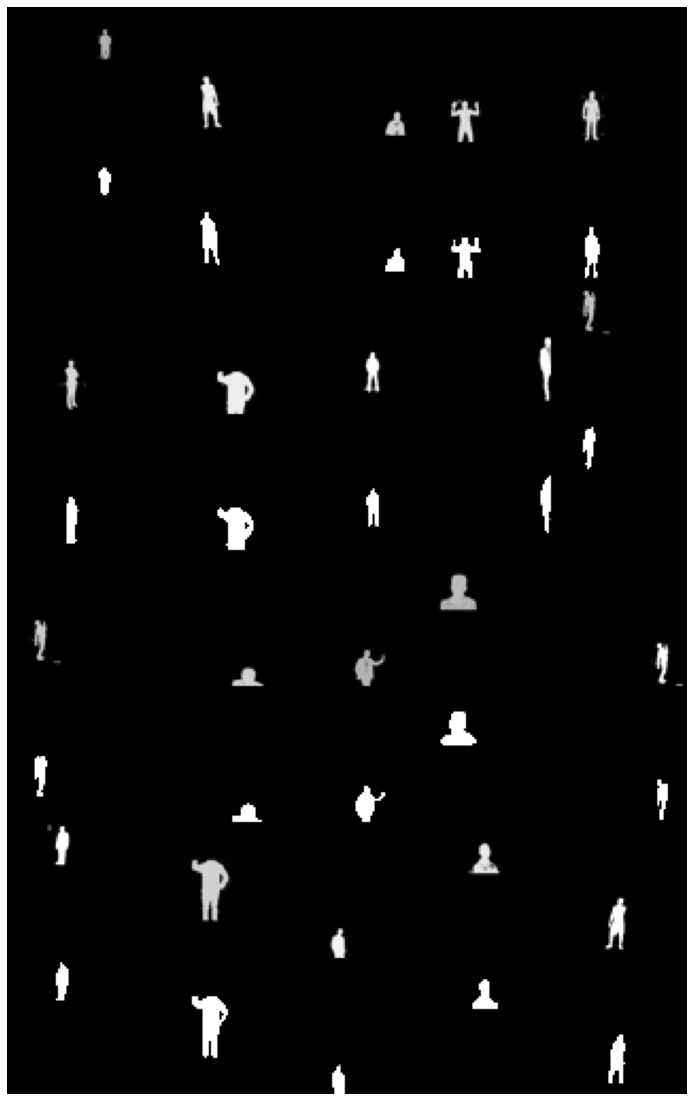

In [21]:
import time

for epoch in range(351,381):
  start = time.time()
  train.train(model, criterion, device, train_dl, optim, epoch, writer)
  end = time.time()
  print('Epoch - ', str(epoch), '-- Time Taken - ', str(end - start) )
  if epoch % 10 == 0:
    file_name = str(weights_folder) + '/epoch-' + str(epoch) + 'weights.pth'
    torch.save(model.state_dict(), file_name)

In [22]:
# from torch.optim.lr_scheduler import StepLR

# scheduler = StepLR(optim, step_size = 50, gamma=0.1, last_epoch=-1)

# for epoch in range(151,301):
#   start = time.time()
#   train.train(model, criterion, device, train_dl, optim, epoch, writer)
#   end = time.time()
#   print('Epoch - ', str(epoch), '-- Time Taken - ', str(end - start) )
#   # val_loss = validate(model, criterion, device, validate_dl)
#   # print(val_loss)
#   scheduler.step()
#   if epoch % 10 == 0:
#     file_name = str(weights_folder) + '/epoch-' + str(epoch) + 'weights.pth'
#     torch.save(model.state_dict(), file_name)